## Aizhan Borubaeva

## Prediction with Machine Learning for Economists

## 2023/24 Fall

## Assignment 3

Below you can find the code for Assignment 3

# I Import data
1) I Importing packages

In [1]:
import os
import sys
import warnings
import requests
import patsy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

from plotnine import *
from io import BytesIO
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV,
)
from sklearn.metrics import (
    auc,
    brier_score_loss,
    confusion_matrix,
    mean_squared_error,
    make_scorer,
    roc_auc_score,
    roc_curve,
)

warnings.filterwarnings("ignore")

# II Data cleaning
1) Review the data

In [2]:
data=pd.read_csv("cs_bisnode_panel.csv", low_memory=False)

In [3]:
print(data.columns)

Index(['comp_id', 'begin', 'end', 'COGS', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'finished_prod',
       'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories',
       'liq_assets', 'material_exp', 'net_dom_sales', 'net_exp_sales',
       'personnel_exp', 'profit_loss_year', 'sales', 'share_eq',
       'subscribed_cap', 'tang_assets', 'wages', 'D', 'balsheet_flag',
       'balsheet_length', 'balsheet_notfullyear', 'year', 'founded_year',
       'exit_year', 'ceo_count', 'foreign', 'female', 'birth_year',
       'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind',
       'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg'],
      dtype='object')


In [4]:
data.describe()
data

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1.001034e+06,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1.001034e+06,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1.001034e+06,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1.001034e+06,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1.001034e+06,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,NaN,0.000000,1807.407349,3.703704,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,NaN,0.000000,1518.518555,96.296295,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,NaN,0.000000,988.888916,77.777779,0.0,0.0,0.0,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,NaN,0.000000,644.444458,233.333328,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


In [5]:
print(data['year'].value_counts())

year
2013    28474
2012    28469
2011    28222
2014    28151
2015    27506
2010    26784
2009    25596
2008    23733
2007    21804
2006    20200
2005    19147
2016     9743
Name: count, dtype: int64


2) Drop variables that we will not need

In [6]:
data = data.drop(
    columns=["COGS", "finished_prod", "net_dom_sales", "net_exp_sales", "wages"]
)

In [7]:
data = data[(data['year'] >= 2010) & (data['year'] <= 2015)]

In [8]:
print(data['year'].value_counts())

data.describe()

year
2013    28474
2012    28469
2011    28222
2014    28151
2015    27506
2010    26784
Name: count, dtype: int64


,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,...,ceo_count,foreign,female,birth_year,inoffice_days,nace_main,ind2,ind,urban_m,labor_avg
count,1.676060e+05,1.634890e+05,1.675490e+05,1.675490e+05,1.638550e+05,1.638550e+05,1.638510e+05,1.675490e+05,1.638640e+05,1.675490e+05,...,149203.000000,149203.000000,149203.000000,124385.000000,149203.000000,167547.000000,167547.000000,162640.000000,167606.000000,114260.000000
mean,1.540309e+11,1.719720e+04,1.940143e+05,1.577606e+05,1.602941e+03,3.455814e+03,1.858043e+03,2.720322e+05,1.752997e+04,9.770384e+03,...,1.255618,0.110948,0.261350,1965.863693,2881.623659,4897.088841,48.743970,2.706911,2.069055,0.969446
std,1.381840e+11,2.084372e+05,1.806004e+06,1.752801e+06,8.162772e+04,2.064169e+05,1.959890e+05,8.027344e+06,5.579899e+05,7.250462e+05,...,0.518682,0.303227,0.409229,11.652605,1748.134896,1227.779618,12.345946,0.503574,0.850078,4.693914
min,1.001034e+06,-5.780000e+04,-4.829259e+04,-2.277778e+04,-1.335852e+05,-2.744074e+05,-6.181263e+06,-7.340741e+03,-4.194870e+07,-5.370370e+02,...,1.000000,0.000000,0.000000,1920.000000,1.000000,111.000000,1.000000,1.000000,1.000000,0.000000
25%,2.878871e+10,0.000000e+00,1.855556e+03,1.688889e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.825926e+03,0.000000e+00,...,1.000000,0.000000,0.000000,1957.000000,1617.000000,3320.000000,33.000000,2.000000,1.000000,0.090278
50%,1.152356e+11,5.518519e+02,8.555556e+03,1.026667e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.503704e+03,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,1967.000000,2497.000000,5610.000000,56.000000,3.000000,2.000000,0.234848
75%,2.586612e+11,3.118519e+03,3.207407e+04,3.982963e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.984074e+04,3.159259e+03,0.000000e+00,...,1.000000,0.000000,0.500000,1975.000000,3527.000000,5610.000000,56.000000,3.000000,3.000000,0.548611
max,4.641209e+11,2.799496e+07,1.411015e+08,3.264051e+08,1.704172e+07,7.233078e+07,7.233078e+07,2.696748e+09,7.921782e+07,1.594445e+08,...,15.000000,1.000000,1.000000,2016.000000,10983.000000,9609.000000,96.000000,3.000000,3.000000,208.677078


In [9]:
data

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
5,1.001034e+06,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,637.037048,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
6,1.001034e+06,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,481.481476,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
7,1.001034e+06,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,340.740753,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
8,1.001034e+06,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,200.000000,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
9,1.001034e+06,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,170.370377,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,0.000000,1807.407349,3.703704,0.0,0.0,0.0,0.000000,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,0.000000,1518.518555,96.296295,0.0,0.0,0.0,0.000000,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,0.000000,988.888916,77.777779,0.0,0.0,0.0,0.000000,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,0.000000,644.444458,233.333328,0.0,0.0,0.0,0.000000,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


3. Adding missing variables

In [10]:
data = (
    data.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = data.replace("toReplace", np.nan)

4. Generate status_alive; if sales larger than zero and not-NA, then firm is alive

In [11]:
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

5. Growth if profit is higher than in previous year, and sales are positive

In [12]:
data["growth"] = (
    (data["status_alive"] == 1) &
    (data["profit_loss_year"].shift(-1) > data["profit_loss_year"])
).astype(int)

6. Data description

In [13]:
data["growth"].describe()

count    236250.000000
mean          0.195276
std           0.396414
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: growth, dtype: float64

In [14]:
data["sales"].describe()

count    1.638640e+05
mean     4.662059e+05
std      3.789100e+06
min     -2.553889e+05
25%      3.092593e+03
50%      2.697037e+04
75%      1.060620e+05
max      1.110294e+08
Name: sales, dtype: float64

7. Label and feature engineering

In [15]:
data["sales"] = np.where(
    data["sales"] < 0, 1, data["sales"]
)  # has to be outside of assin()
data = data.assign(
    ln_sales=np.where(
        data["sales"] > 0,
        np.log(data["sales"]),
        (np.where(data["sales"].isna(), np.nan, 0)),
    ),  # NaN remain NaN
    sales_mil=data["sales"] / 1000000,
    sales_mil_log=np.where(
        data["sales"] > 0,
        np.log(data["sales"] / 1000000),
        (np.where(data["sales"].isna(), np.nan, 0)),
    ),
)

In [16]:
data["d1_sales_mil_log"] = data["sales_mil_log"] - data.groupby("comp_id")[
    "sales_mil_log"
].shift(1)

In [17]:
# replace w 0 for new firms + add dummy to capture it
data["age"] = np.where(
    data["year"] - data["founded_year"] < 0, 0, data["year"] - data["founded_year"]
)
data["new"] = np.where(
    ((data["age"] <= 1) | (data["balsheet_notfullyear"] == 1)),
    1,
    (np.where(data["age"].isna(), np.nan, 0)),
)
data["d1_sales_mil_log"] = np.where(
    data["new"] == 1, 0, np.where(data["new"].isna(), np.nan, data["d1_sales_mil_log"])
)
data["new"] = np.where(data["d1_sales_mil_log"].isna(), 1, data["new"])
data["d1_sales_mil_log"] = np.where(
    data["d1_sales_mil_log"].isna(), 0, data["d1_sales_mil_log"]
)

8. Sample design

In [18]:
data = data.query("status_alive == 1")     
data = data.query("sales_mil<=8 & sales_mil>=0.001")  # Firms below 8 million euro revenues and above 1000 euros
data = data.query("age<=30")  # Firms with age below 30 years


In [19]:
data["growth"].describe()

count    116407.000000
mean          0.338081
std           0.473058
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: growth, dtype: float64

9. Changing some industry category codes

In [20]:
data["ind2_cat"] = data["ind2"].copy()
data["ind2_cat"] = np.where(data["ind2"] > 56, 60, data["ind2_cat"])
data["ind2_cat"] = np.where(data["ind2"] < 26, 20, data["ind2_cat"])
data["ind2_cat"] = np.where(
    (data["ind2"] < 55) & (data["ind2"] > 35), 40, data["ind2_cat"]
)
data["ind2_cat"] = np.where(data["ind2"] == 31, 30, data["ind2_cat"])
data["ind2_cat"] = np.where(data["ind2"].isna(), 99, data["ind2_cat"])

10. Firm characteristics

In [21]:
data["age2"] = data["age"] ** 2
data["foreign_management"] = np.where(
    data["foreign"] >= 0.5, 1, np.where(data["foreign"].isna(), np.nan, 0)
)
data["gender_m"] = data["gender"].astype("category")
data["m_region_loc"] = data["region_m"].astype("category")

In [22]:
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"] < 0)
        | (data["curr_assets"] < 0)
        | (data["fixed_assets"] < 0)
    ),
    1,
    0,
)
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"].isna())
        | (data["curr_assets"].isna())
        | (data["fixed_assets"].isna())
    ),
    np.nan,
    data["flag_asset_problem"],
)
data.groupby("flag_asset_problem").count()["comp_id"]

flag_asset_problem
0.0    116319
1.0        60
Name: comp_id, dtype: int64

In [23]:
data["intang_assets"] = np.where(data["intang_assets"] < 0, 0, data["intang_assets"])
data["curr_assets"] = np.where(data["curr_assets"] < 0, 0, data["curr_assets"])
data["fixed_assets"] = np.where(data["fixed_assets"] < 0, 0, data["fixed_assets"])

In [24]:
data["total_assets_bs"] = (
    data["intang_assets"] + data["curr_assets"] + data["fixed_assets"]
)
data["total_assets_bs"].describe()

count    1.163790e+05
mean     2.508491e+05
std      1.739398e+06
min      0.000000e+00
25%      7.862963e+03
50%      2.757778e+04
75%      1.080204e+05
max      3.190691e+08
Name: total_assets_bs, dtype: float64

In [25]:
pl_names = [
    "extra_exp",
    "extra_inc",
    "inc_bef_tax",
    "inventories",
    "material_exp",
    "personnel_exp",
]
bs_names = [
    "intang_assets",
    "curr_liab",
    "fixed_assets",
    "liq_assets",
    "curr_assets",
    "share_eq",
    "subscribed_cap",
    "tang_assets",
]

11. Divide all pl_names elements by sales and create new column for it

In [26]:
data[[col + "_pl" for col in pl_names]] = data[pl_names].div(
    data["sales"], axis="index"
)

12. Divide all bs_names elements by total_assets_bs and create new column for it

In [27]:
data[[col + "_bs" for col in bs_names]] = (
    data[bs_names]
    .div(data["total_assets_bs"], axis="index")
    .replace((np.inf, -np.inf, np.nan), (0, 0, 0))
)

13. Get NaN values where total_assets_bs is NaN

In [28]:
for col in bs_names:
    data[col + "_bs"] = np.where(
        data["total_assets_bs"].isna(), np.nan, data[col + "_bs"]
    )

14. Creating flags, and winsorizing tails

In [29]:
zero = [
    "extra_exp_pl",
    "extra_inc_pl",
    "inventories_pl",
    "material_exp_pl",
    "personnel_exp_pl",
    "curr_liab_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
]

data[[col + "_flag_high" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] > 1).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] > 1, 1, data[zero])
)
data[[col + "_flag_error" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] < 0).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] < 0, 0, data[zero])
)

In [30]:
# for vars that could be any, but are mostly between -1 and 1
anyof = ["inc_bef_tax_pl", "share_eq_bs"]

data[[col + "_flag_low" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] < -1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] < -1), -1, data[anyof])
)
data[[col + "_flag_high" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] > 1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] > 1), 1, data[anyof])
)
data[[col + "_flag_zero" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] == 0).astype(int)
)
data[[col + "_quad" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, data[anyof] ** 2
)

In [31]:
# dropping flags with no variation
flag_columns = [col for col in data.columns if "flag" in col]
data = data.drop(
    data[flag_columns].std()[(data[flag_columns].std() == 0)].index, axis=1
)

15. Creating "CEO age"

In [32]:
data["ceo_age"] = data["year"] - data["birth_year"]
data = data.assign(
    flag_low_ceo_age=(data["ceo_age"] < 25).astype(int),
    flag_high_ceo_age=(data["ceo_age"] > 75).astype(int),
    flag_miss_ceo_age=(data["ceo_age"].isna()).astype(int),
)

data["ceo_age"] = np.where(data["ceo_age"] < 25, 25, data["ceo_age"])
data["ceo_age"] = np.where(data["ceo_age"] > 75, 75, data["ceo_age"])
data["ceo_age"] = np.where(
    data["ceo_age"].isna(), data["ceo_age"].mean(), data["ceo_age"]
)
data["ceo_young"] = (data["ceo_age"] < 40).astype(int)


In [33]:
data["labor_avg_mod"] = np.where(
    data["labor_avg"].isna(), data["labor_avg"].mean(), data["labor_avg"]
)
data["flag_miss_labor_avg"] = (data["labor_avg"].isna()).astype(int)

In [34]:
data["urban_m"] = data["urban_m"].astype("category")
data["ind2_cat"] = data["ind2_cat"].astype("category")
data["growth_f"] = data["growth"].astype("category")
data["growth_f"] = data["growth_f"].cat.rename_categories(["no_growth", "growth"])
data["sales_mil_log_sq"] = data["sales_mil_log"] ** 2

16. Generation of additional variables

In [35]:
data["flag_low_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] < -1.5, 1, 0)
data["flag_high_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] > 1.5, 1, 0)
data["d1_sales_mil_log_mod"] = np.where(
    data["d1_sales_mil_log"] < -1.5,
    -1.5,
    np.where(data["d1_sales_mil_log"] > 1.5, 1.5, data["d1_sales_mil_log"]),
)
data["d1_sales_mil_log_mod_sq"] = data["d1_sales_mil_log_mod"] ** 2

17. Drop missing variables

In [36]:
data = data.dropna(subset=["liq_assets_bs", "foreign", "ind"])

In [37]:
data = data.dropna(subset=["age", "foreign", "material_exp_pl", "m_region_loc"])
data["age"].describe()

count    112421.000000
mean          9.058699
std           7.059890
min           0.000000
25%           3.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: age, dtype: float64

In [38]:
for col in data.select_dtypes(include=["category"]).columns:
    data[col] = data[col].cat.remove_unused_categories()

18. Data description and building histograms

In [39]:
data.describe()

,year,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,...,flag_high_ceo_age,flag_miss_ceo_age,ceo_young,labor_avg_mod,flag_miss_labor_avg,sales_mil_log_sq,flag_low_d1_sales_mil_log,flag_high_d1_sales_mil_log,d1_sales_mil_log_mod,d1_sales_mil_log_mod_sq
count,112421.000000,1.124210e+05,1.124210e+05,1.124210e+05,1.124210e+05,1.124170e+05,1.124170e+05,1.124170e+05,1.124210e+05,1.124210e+05,...,112421.000000,112421.000000,112421.000000,112421.000000,112421.000000,1.124210e+05,112421.000000,112421.000000,112421.000000,112421.000000
mean,2012.558899,1.536041e+11,8.822988e+03,9.739667e+04,8.421071e+04,6.508492e+02,1.966676e+03,1.319382e+03,1.456939e+05,7.144224e+03,...,0.004830,0.137732,0.252533,0.641858,0.179077,1.174011e+01,0.032903,0.019898,-0.003038,0.247753
std,1.697045,1.379459e+11,4.069202e+04,6.800416e+05,5.999800e+05,2.485087e+04,5.547906e+04,5.769486e+04,1.229762e+06,1.676442e+05,...,0.069331,0.344620,0.434467,1.375570,0.383418,1.023719e+01,0.178384,0.139652,0.497740,0.567731
min,2010.000000,1.001034e+06,-5.780000e+04,0.000000e+00,-8.759259e+03,-1.335852e+05,-2.550000e+04,-5.514540e+06,0.000000e+00,-1.835527e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.087363e-09,0.000000,0.000000,-1.500000,0.000000
25%,2011.000000,2.880282e+10,1.703704e+02,3.766667e+03,3.633333e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.814815e+02,-5.185185e+03,...,0.000000,0.000000,0.000000,0.152778,0.000000,3.709876e+00,0.000000,0.000000,-0.086033,0.000000
50%,2013.000000,1.147486e+11,1.029630e+03,1.270370e+04,1.485185e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.437037e+03,4.888889e+02,...,0.000000,0.000000,0.000000,0.340278,0.000000,9.246508e+00,0.000000,0.000000,0.000000,0.013300
75%,2014.000000,2.577391e+11,4.455556e+03,4.373333e+04,4.943704e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.365185e+04,5.333333e+03,...,0.000000,0.000000,1.000000,0.645934,0.000000,1.676366e+01,0.000000,0.000000,0.137734,0.134895
max,2015.000000,4.641050e+11,3.570863e+06,1.411015e+08,1.376625e+08,5.514540e+06,1.197874e+07,1.197874e+07,1.594445e+08,2.943638e+07,...,1.000000,1.000000,1.000000,54.954544,1.000000,4.771708e+01,1.000000,1.000000,1.500000,2.250000


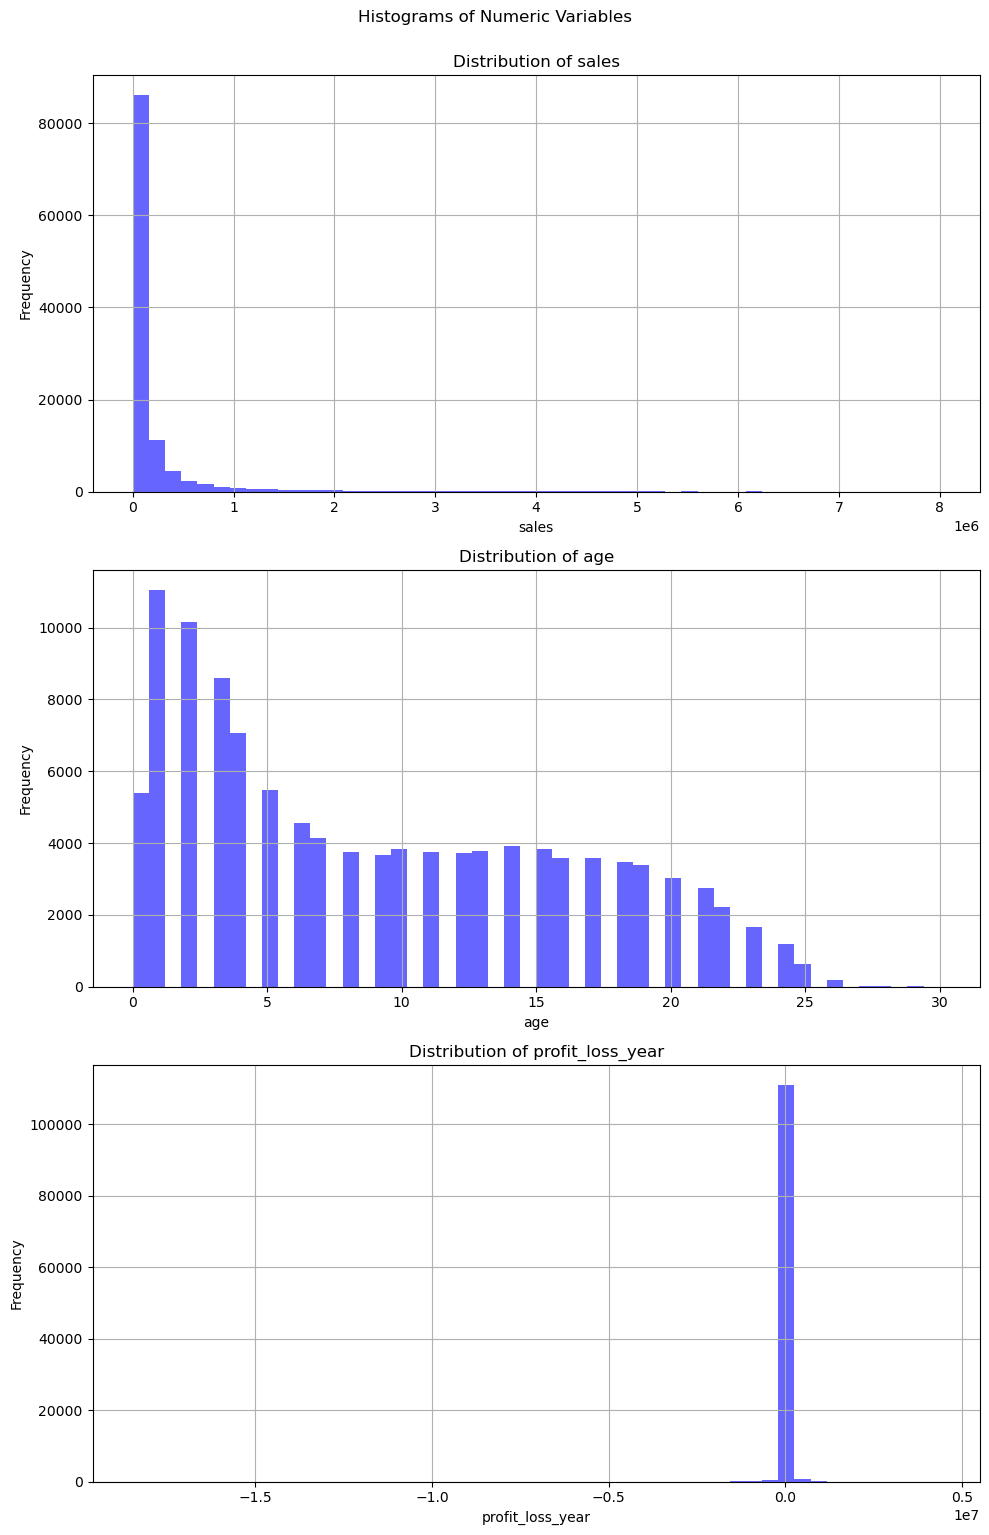

In [40]:
numeric_vars = ['sales', 'age', 'profit_loss_year']
fig, axs = plt.subplots(len(numeric_vars), figsize=(10, 5*len(numeric_vars)))

for i, var in enumerate(numeric_vars):
    axs[i].hist(data[var], bins=50, alpha=0.6, color='blue')
    axs[i].set_title(f'Distribution of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle('Histograms of Numeric Variables', y=1.02)  # Overall title for the entire figure
plt.show()

In [41]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("explained_variance: ", round(explained_variance, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


def coef_matrix(X, model):

    coef_matrix = pd.concat(
        [pd.DataFrame(X.columns), pd.DataFrame(np.transpose(model.coef_))], axis=1
    )
    coef_matrix.columns = ["variable", "coefficient"]
    coef_matrix = coef_matrix.append(
        {"variable": "Intercept", "coefficient": model.intercept_},
        ignore_index=True,
    )
    return coef_matrix

In [42]:
def cv_summary(lambdas, C_values, model):
    d = {
        "lambdas": lambdas,
        "C_values": C_values,
        "mean_cv_score": model.scores_[1].mean(axis=0),
    }
    return pd.DataFrame(data=d)


def create_roc_plot(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    all_coords = pd.DataFrame({"fpr": fpr, "tpr": tpr, "thresholds": thresholds})

    plot = (
        ggplot(all_coords, aes(x="fpr", y="tpr"))
        + geom_line(color=color[0], size=0.7)
        + geom_area(position="identity", fill="mediumaquamarine", alpha=0.3)
        + xlab("False Positive Rate (1-Specifity)")
        + ylab("True Positive Rate (Sensitivity)")
        + geom_abline(intercept=0, slope=1, linetype="dotted", color="black")
        + scale_y_continuous(limits=(0, 1), breaks=seq(0, 1, 0.1), expand=(0, 0.01))
        + scale_x_continuous(limits=(0, 1), breaks=seq(0, 1, 0.1), expand=(0.01, 0))
        + theme_bw()
    )
    return plot

In [43]:
def sigmoid_array(x):
    return 1 / (1 + np.exp(-x))


def generate_fold_prediction(model, X, fold, param_index):
    fold_coef = model.coefs_paths_[1][fold, param_index, :]
    return sigmoid_array(
        np.dot(X, np.transpose(fold_coef)[:-1]) + np.transpose(fold_coef)[-1]
    )


def create_loss_plot(all_coords, optimal_threshold, curr_exp_loss):
    all_coords_copy = all_coords.copy()
    all_coords_copy["loss"] = (
        all_coords_copy.false_pos * FP + all_coords_copy.false_neg * FN
    ) / all_coords_copy.n

    t = optimal_threshold
    l = curr_exp_loss
    
    plot = (
        ggplot(all_coords_copy, aes(x="thresholds", y="loss"))
        + geom_line(color=color[0], size=0.7)
        + scale_x_continuous(breaks=seq(0, 1.1, by=0.1))
        + coord_cartesian(xlim=(0, 1))
        + geom_vline(xintercept=t, color=color[0])
        + annotate(
            geom="text",
            x=t - 0.01,
            y=max(all_coords_copy.loss) - 0.4,
            label="best threshold: " + str(round(t, 2)),
            colour=color[1],
            angle=90,
            size=7,
        )
        + annotate(geom="text", x=t + 0.06, y=l, label=str(round(l, 2)), size=7)
        + theme_bw()
    )
    return plot

In [44]:
def create_roc_plot_with_optimal(all_coords, optimal_threshold):
    all_coords_copy = all_coords.copy()
    all_coords_copy["sp"] = 1 - all_coords_copy.true_neg / all_coords_copy.neg
    all_coords_copy["se"] = all_coords_copy.true_pos / all_coords_copy.pos

    best_coords = all_coords_copy[all_coords_copy.thresholds == optimal_threshold]
    sp = best_coords.sp.values[0]
    se = best_coords.se.values[0]

    plot = (
        ggplot(all_coords_copy, aes(x="sp", y="se"))
        + geom_line(color=color[0], size=0.7)
        + scale_y_continuous(breaks=seq(0, 1.1, by=0.1))
        + scale_x_continuous(breaks=seq(0, 1.1, by=0.1))
        + geom_point(data=pd.DataFrame({"sp": [sp], "se": [se]}))
        + annotate(
            geom="text",
            x=sp,
            y=se + 0.03,
            label=str(round(sp, 2)) + ", " + str(round(se, 2)),
            size=7,
        )
        + geom_area(position="identity", fill="mediumaquamarine", alpha=0.3)
        + xlab("False Positive Rate (1-Specifity)")
        + ylab("True Positive Rate (Sensitivity)")
        + geom_abline(intercept=0, slope=1, linetype="dotted", color="black")
        + theme_bw()
    )
    return plot

## III Model building
## Define variable sets
1. Main firm variables

In [45]:
rawvars = [
    "curr_assets",
    "curr_liab",
    "extra_exp",
    "extra_inc",
    "fixed_assets",
    "inc_bef_tax",
    "intang_assets",
    "inventories",
    "liq_assets",
    "material_exp",
    "personnel_exp",
    "sales",
    "share_eq",
    "subscribed_cap",
]

2. Further financial variables

In [46]:
qualityvars = ["balsheet_flag", "balsheet_length", "balsheet_notfullyear"]
engvar = [
    "total_assets_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "share_eq_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
    "extra_exp_pl",
    "extra_inc_pl",
    "inc_bef_tax_pl",
    "inventories_pl",
    "material_exp_pl",
    "personnel_exp_pl",
]
engvar2 = [
    "inc_bef_tax_pl_quad",
    "share_eq_bs_quad",
]

3. Flag variables

In [47]:
engvar3 = []
for col in data.columns:
    if (
        col.endswith("flag_low")
        or col.endswith("flag_high")
        or col.endswith("flag_error")
        or col.endswith("flag_zero")
    ):
        engvar3.append(col)

4. Growth variables

In [48]:
d1 = [
    "d1_sales_mil_log_mod",
    "d1_sales_mil_log_mod_sq",
    "flag_low_d1_sales_mil_log",
    "flag_high_d1_sales_mil_log",
]

5. Human capital related variables

In [49]:
hr = [
    "female",
    "ceo_age",
    "flag_high_ceo_age",
    "flag_low_ceo_age",
    "flag_miss_ceo_age",
    "ceo_count",
    "labor_avg_mod",
    "flag_miss_labor_avg",
    "foreign_management",
]

6. Firms history related variables

In [50]:
firm = ["age", "age2", "new", "C(ind2_cat)", "C(m_region_loc)", "C(urban_m)"]

7. Interactions for logit, LASSO

In [51]:
interactions1 = [
    "C(ind2_cat)*age",
    "C(ind2_cat)*age2",
    "C(ind2_cat)*d1_sales_mil_log_mod",
    "C(ind2_cat)*sales_mil_log",
    "C(ind2_cat)*ceo_age",
    "C(ind2_cat)*foreign_management",
    "C(ind2_cat)*female",
    "C(ind2_cat)*C(urban_m)",
    "C(ind2_cat)*labor_avg_mod",
]
interactions2 = [
    "sales_mil_log*age",
    "sales_mil_log*female",
    "sales_mil_log*foreign_management",
]

## IV Model setups
1. Simple logit models

In [52]:
M1 = [
    "sales_mil_log",
    "sales_mil_log_sq",
    "d1_sales_mil_log_mod",
    "C(ind2_cat)",
]
M2 = [
    "sales_mil_log",
    "sales_mil_log_sq",
    "d1_sales_mil_log_mod",
    "fixed_assets_bs",
    "share_eq_bs",
    "curr_liab_bs ",
    "curr_liab_bs_flag_high ",
    "curr_liab_bs_flag_error",
    "age",
    "foreign_management",
    "C(ind2_cat)",
]
M3 = ["sales_mil_log", "sales_mil_log_sq"] + firm + engvar + d1
M4 = (
    ["sales_mil_log", "sales_mil_log_sq"]
    + firm
    + engvar
    + engvar2
    + engvar3
    + d1
    + hr
    + qualityvars
)
M5 = (
    ["sales_mil_log", "sales_mil_log_sq"]
    + firm
    + engvar
    + engvar2
    + engvar3
    + d1
    + hr
    + qualityvars
    + interactions1
    + interactions2
)

2. logit+LASSO

In [53]:
logit_lasso_vars = (
    ["sales_mil_log", "sales_mil_log_sq"]
    + engvar
    + engvar2
    + engvar3
    + d1
    + hr
    + firm
    + qualityvars
    + interactions1
    + interactions2
)

3. CART and RF (no interactions, no modified features)

In [54]:
rfvars = ["sales_mil", "d1_sales_mil_log"] + rawvars + hr + firm + qualityvars

## V. Split the dataset for train and holdout sets

In [55]:
train_years = [2012]
test_years = [2013]

data_train = data[data['year'].isin(train_years)]
data_holdout = data[data['year'].isin(test_years)]


In [56]:
print("Total")
print(data["growth"].value_counts(normalize=True))
print("Train")
print(data_train["growth"].value_counts(normalize=True))
print("Holdout")
print(data_holdout["growth"].value_counts(normalize=True))

Total
growth
0    0.660277
1    0.339723
Name: proportion, dtype: float64
Train
growth
0    0.646411
1    0.353589
Name: proportion, dtype: float64
Holdout
growth
0    0.657522
1    0.342478
Name: proportion, dtype: float64


## VI. Predict probabilities with logit and Lasso with CV

1. Specify 5 fold cross-validation method

In [57]:
k = KFold(n_splits=5, shuffle=True, random_state=42)

2. Cross validate logit models

In [58]:
logit_model_vars = [M1, M2, M3, M4, M5]

In [59]:
C_value_logit = [1e20]

In [60]:
logit_models = dict()
CV_RMSE_folds = dict()

for i, model_vars in enumerate(logit_model_vars):

    model_equation = "growth~" + "+".join(model_vars)
    y_train, X_train = patsy.dmatrices(model_equation, data_train)

    LRCV_brier = LogisticRegressionCV(
        Cs=C_value_logit,
        cv=k,
        refit=True,
        scoring="neg_brier_score",
        solver="newton-cg",
        tol=1e-7,
        random_state=42,
    )

    logit_models["M" + str(i + 1)] = LRCV_brier.fit(X_train, y_train)

    # Calculate RMSE on test for each fold
    CV_RMSE_folds["M" + str(i + 1)] = np.sqrt(
        -1 * logit_models["M" + str(i + 1)].scores_[1].ravel()
    )

In [61]:
pd.DataFrame(CV_RMSE_folds)

,M1,M2,M3,M4,M5
0,0.470362,0.461790,0.444449,0.442547,0.443389
1,0.466114,0.455568,0.440637,0.438645,0.439382
2,0.469680,0.460880,0.447971,0.445212,0.446895
3,0.467930,0.457059,0.444524,0.442087,0.442194
4,0.467187,0.456808,0.443768,0.441345,0.440369


2. Logit + LASSO

In [62]:
model_equation = "growth~" + "+".join(logit_lasso_vars)
y_train, X_train = patsy.dmatrices(model_equation, data_train)

In [63]:
# normalise X vars for Lasso
normalized_logitvars = pd.DataFrame(
    StandardScaler().fit_transform(X_train),
    columns=X_train.design_info.column_names,
)

In [64]:
# Set regularization parameters
lambdas = list(10 ** np.arange(-1, -4.01, -1 / 3))
n_obs = normalized_logitvars.shape[0] * 4 / 5
C_values = [
    1 / (l * n_obs) for l in lambdas
] 

In [65]:
logLasso_brier = LogisticRegressionCV(
    Cs=C_values,
    penalty="l1",
    cv=k,
    refit=True,
    scoring="neg_brier_score",
    solver="liblinear",
    random_state=42,
)

logit_models["LASSO"] = logLasso_brier.fit(normalized_logitvars, y_train)

In [66]:
cv_summary_lasso = cv_summary(lambdas, C_values, logit_models["LASSO"])
cv_summary_lasso["mean_cv_score"] = np.sqrt(cv_summary_lasso["mean_cv_score"] * -1)
cv_summary_lasso

,lambdas,C_values,mean_cv_score
0,0.100000,0.000658,0.471776
1,0.046416,0.001418,0.452267
2,0.021544,0.003055,0.447651
3,0.010000,0.006582,0.444478
4,0.004642,0.014181,0.443145
5,0.002154,0.030551,0.442236
6,0.001000,0.065821,0.442054
7,0.000464,0.141806,0.442224
8,0.000215,0.305512,0.442415
9,0.000100,0.658207,0.442583


In [67]:
best_lambda_i = cv_summary_lasso["mean_cv_score"].idxmin()

In [68]:
CV_RMSE_folds["LASSO"] = np.sqrt(
    -1 * logit_models["LASSO"].scores_[1][:, best_lambda_i]
)

## VII. AUC, Calibration Curve, Confusion Matrix, ROC

1. LOGIT

In [69]:
CV_AUC_folds = dict()
for i, model_vars in enumerate(logit_model_vars):

    model_equation = "growth~" + "+".join(model_vars)
    y_train, X_train = patsy.dmatrices(model_equation, data_train)

    LRCV_auc = LogisticRegressionCV(
        Cs=C_value_logit,
        cv=k,
        refit=True,
        scoring="roc_auc",
        solver="newton-cg",
        tol=1e-7,
        random_state=42,
    )

    logit_models["M" + str(i + 1)] = LRCV_auc.fit(X_train, y_train)

    # Calculate AUC on test for each fold
    CV_AUC_folds["M" + str(i + 1)] = logit_models["M" + str(i + 1)].scores_[1].ravel()

2. LASSO

In [70]:
logLasso_auc = LogisticRegressionCV(
    Cs=C_values,
    penalty="l1",
    cv=k,
    refit=True,
    scoring="roc_auc",
    solver="liblinear",
    random_state=42,
)
logLasso_auc_fitted = logLasso_auc.fit(normalized_logitvars, y_train)

CV_AUC_folds["LASSO"] = logLasso_auc_fitted.scores_[1][
    :, cv_summary_lasso["mean_cv_score"].idxmin()
]

3. Summary frame

In [71]:
model_fits = pd.DataFrame(logit_models, index=["Model fit"]).T

summary = (
    model_fits["Model fit"]
    .apply(lambda x: x.n_features_in_)
    .to_frame(name="Number of Coefficients")
)

summary.loc["LASSO", "Number of Coefficients"] = len(
    [i for i in model_fits.loc["LASSO"].values[0].coef_[0] if i != 0]
)

summary["CV RMSE"] = pd.DataFrame(CV_RMSE_folds).T.mean(axis=1)
summary["CV AUC"] = pd.DataFrame(CV_AUC_folds).T.mean(axis=1)

In [72]:
sum(x != 0 for x in model_fits.loc["LASSO"].values[0].coef_[0].tolist())

89

In [73]:
len(
    [i for i in model_fits.loc["LASSO"].values[0].coef_[0] if i != 0]
)

89

In [74]:
summary

,Number of Coefficients,CV RMSE,CV AUC
M1,11,0.468254,0.619972
M2,18,0.458421,0.672762
M3,34,0.444270,0.731864
M4,70,0.441967,0.737195
M5,143,0.442446,0.733994
LASSO,89,0.442048,0.736526


## VIII. Take best model and estimate RMSE on holdout

1. Choosing the best model

In [126]:
# Because M4 is the best logit model with the highest results of AUC, we chose it
best_logit = logit_models["M2"]
model_equation = "growth~" + "+".join(M2)
_, X_holdout = patsy.dmatrices(model_equation, data_holdout)

In [127]:
print("Missing values in 'growth' column:", data_holdout["growth"].isnull().sum())

Missing values in 'growth' column: 0


In [128]:
print("Length of 'growth' column:", len(data_holdout["growth"]))
print("Number of rows in X_holdout:", X_holdout.shape[0])

Length of 'growth' column: 18845
Number of rows in X_holdout: 18845


In [78]:
#data_holdout = data_holdout.iloc[:-1].reset_index(drop=True) in case in length != Number

In [129]:
data_holdout["best_logit_pred_proba"] = best_logit.predict_proba(X_holdout)[:, 1]

round(rmse(data_holdout["best_logit_pred_proba"], data_holdout["growth"]), 3)

0.454

In [130]:
data_holdout.reset_index(drop=True, inplace=True)

In [131]:
print(data_holdout["best_logit_pred_proba"].isnull().sum())
print(data_holdout["growth"].isnull().sum())

0
0


2. Calibration curve

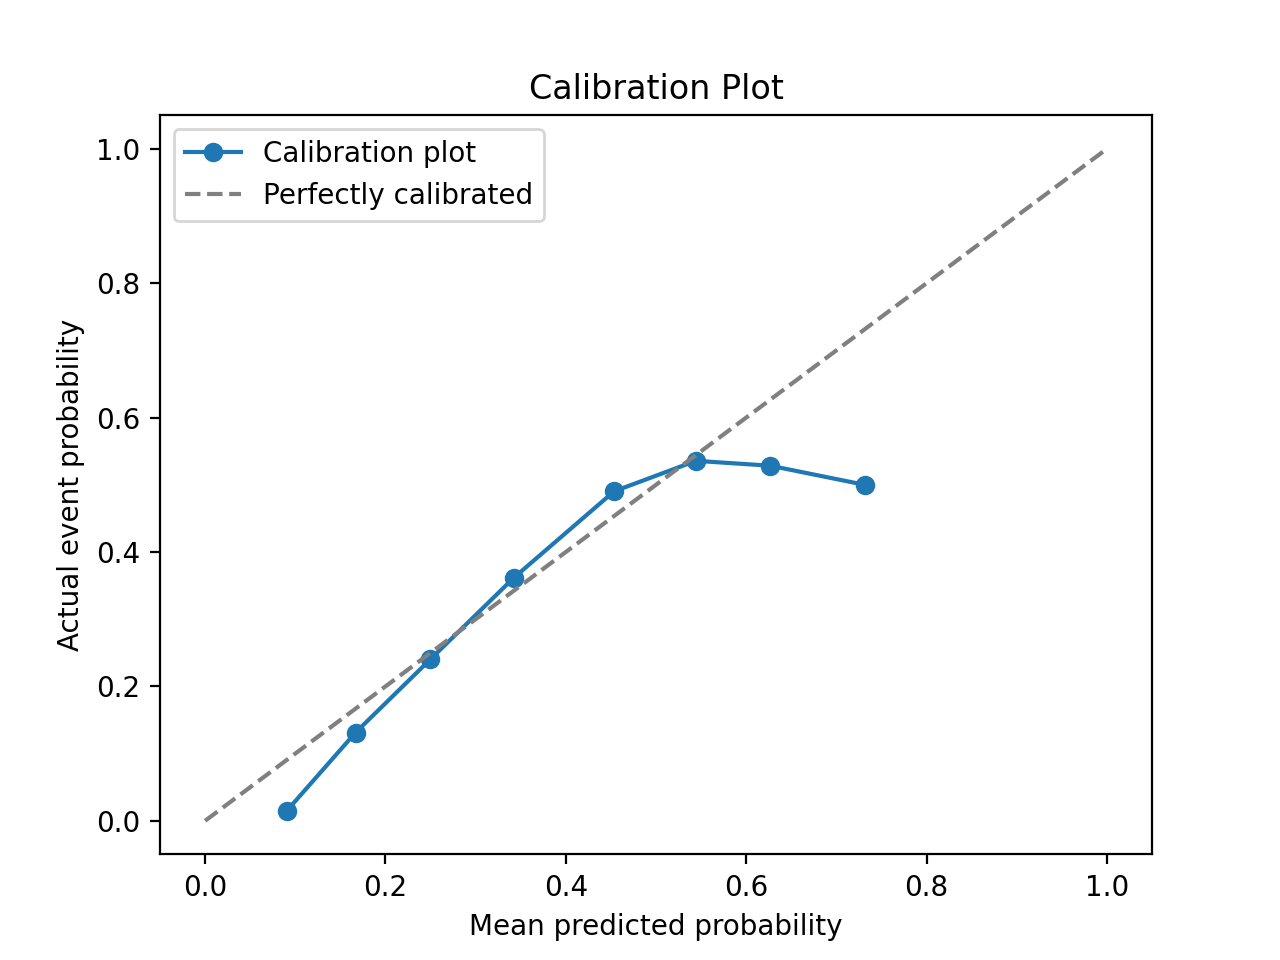

In [132]:
from sklearn.calibration import calibration_curve

def create_calibration_plot(data, prob_var, actual_var, y_lab, n_bins=10, breaks=None):
    # Assuming data[prob_var] contains predicted probabilities and data[actual_var] contains actual labels
    prob_true, prob_pred = calibration_curve(data[actual_var], data[prob_var], n_bins=n_bins, strategy='uniform')

    plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')

    plt.xlabel('Mean predicted probability')
    plt.ylabel(y_lab)
    plt.title('Calibration Plot')
    plt.legend()
    
    if breaks:
        plt.xticks(breaks)
    
    plt.show()

# Your other code here

create_calibration_plot(
    data_holdout,
    prob_var="best_logit_pred_proba",
    actual_var="growth",
    y_lab="Actual event probability",
    n_bins=10,
    breaks=None,
)


In [118]:
best_logit2 = logit_models["M2"]
model_equation2 = "growth~" + "+".join(M2)
_, X_holdout = patsy.dmatrices(model_equation, data_holdout)

In [119]:
print("Missing values in 'growth' column:", data_holdout["growth"].isnull().sum())

Missing values in 'growth' column: 0


In [122]:
data_holdout["best_logit_pred_proba"] = best_logit.predict_proba(X_holdout)[:, 1]

round(rmse(data_holdout["best_logit_pred_proba"], data_holdout["growth"]), 3)
data_holdout.reset_index(drop=True, inplace=True)

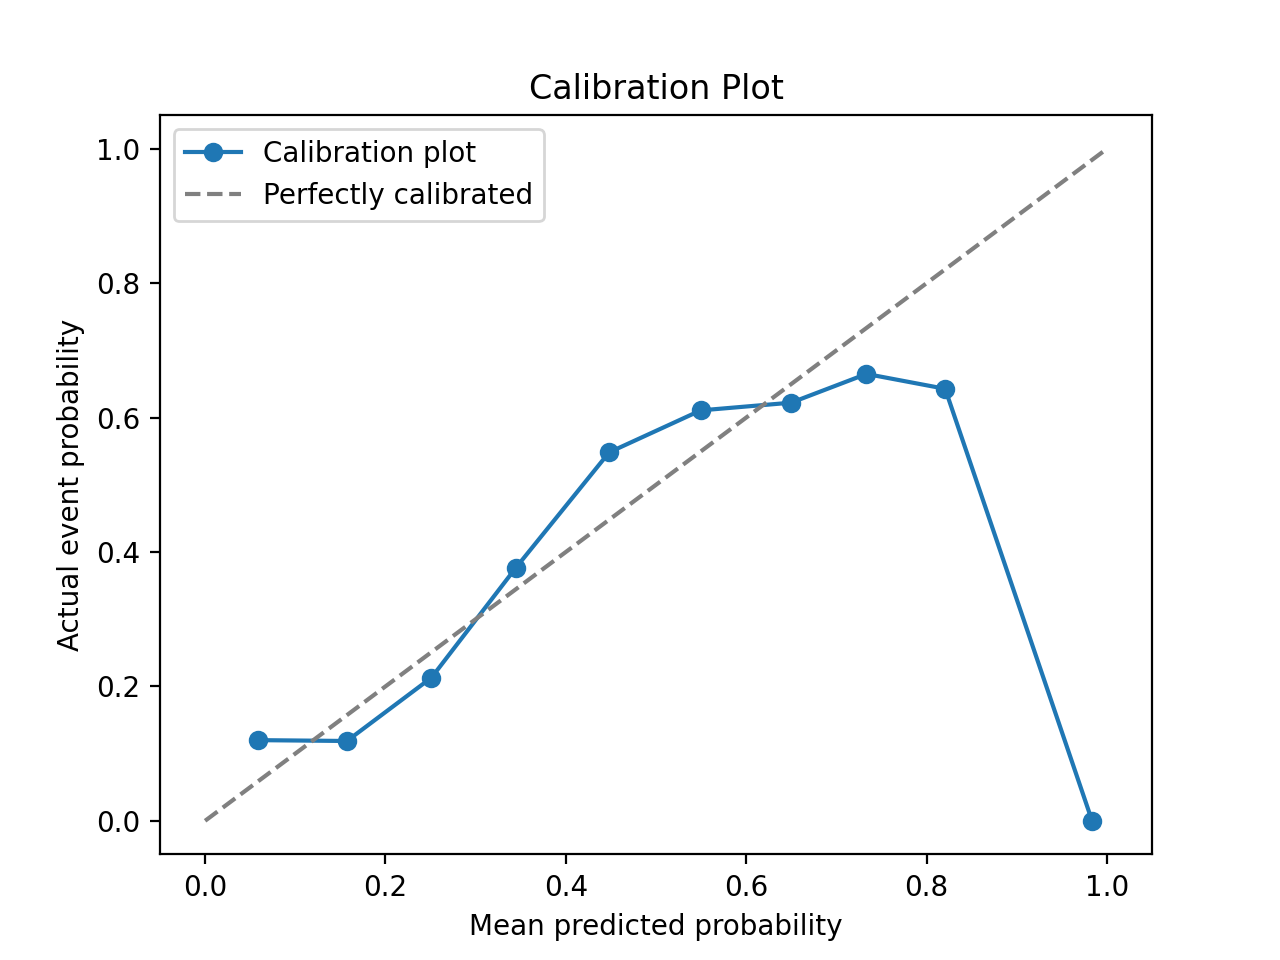

In [124]:
def create_calibration_plot(data, prob_var, actual_var, y_lab, n_bins=10, breaks=None):
    # Assuming data[prob_var] contains predicted probabilities and data[actual_var] contains actual labels
    prob_true, prob_pred = calibration_curve(data[actual_var], data[prob_var], n_bins=n_bins, strategy='uniform')

    plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')

    plt.xlabel('Mean predicted probability')
    plt.ylabel(y_lab)
    plt.title('Calibration Plot')
    plt.legend()
    
    if breaks:
        plt.xticks(breaks)
    
    plt.show()

# Your other code here

create_calibration_plot(
    data_holdout,
    prob_var="best_logit_pred_proba",
    actual_var="growth",
    y_lab="Actual event probability",
    n_bins=10,
    breaks=None,
)

3. Confusion table with different tresholds

In [83]:
logit_class_prediction = best_logit.predict(X_holdout)

values, counts = np.unique(logit_class_prediction.tolist(), return_counts=True)
print(values[0], " (no growth): ", counts[0])
print(values[1], " (growth): ", counts[1])

0.0  (no growth):  14918
1.0  (growth):  3927


In [84]:
cm_object1 = confusion_matrix(
    data_holdout["growth"], logit_class_prediction, labels=[0, 1]
)
cm1 = pd.DataFrame(
    cm_object1,
    index=["Actul no growth", "Actual growth"],
    columns=["Predicted no growth", "Predicted growth"],
)
cm1

,Predicted no growth,Predicted growth
Actul no growth,10912,1479
Actual growth,4006,2448


In [85]:
# 0.5 same as before
holdout_prediction = np.where(data_holdout["best_logit_pred_proba"] < 0.5, 0, 1)
cm_object1b = confusion_matrix(
    data_holdout["growth"], holdout_prediction, labels=[0, 1]
)
cm1b = pd.DataFrame(
    cm_object1b,
    index=["Actul no growth", "Actual growth"],
    columns=["Predicted no growth", "Predicted growth"],
)
cm1b

,Predicted no growth,Predicted growth
Actul no growth,10912,1479
Actual growth,4006,2448


In [86]:
mean_predicted_growth_prob = np.mean(data_holdout["best_logit_pred_proba"])
round(mean_predicted_growth_prob, 3)

0.339

3. Visualize ROC (with thresholds in steps) on holdout

In [87]:
thresholds = np.arange(0.05, 0.76, 0.05)
#thresholds = sorted(np.geomspace(0.95, 0.05, num=17)) # set these treshold values to get even points in the plot
cm = dict()
true_positive_rates = []
false_positive_rates = []
holdout_prediction = []
for thr in thresholds:
    holdout_prediction = np.where(data_holdout["best_logit_pred_proba"] < thr, 0, 1)
    cm_thr = confusion_matrix(data_holdout["growth"], holdout_prediction, labels=[0, 1])
    cm[thr] = cm_thr
    tn, fp, fn, tp = cm_thr.ravel()
    true_positive_rates.append(tp / (tp + fn))
    false_positive_rates.append(fp / (fp + tn))

In [88]:
tpr_fpr_for_thresholds = pd.DataFrame(
    {
        "thresholds": thresholds,
        "true_positive_rates": true_positive_rates,
        "false_positive_rates": false_positive_rates,
    }
)

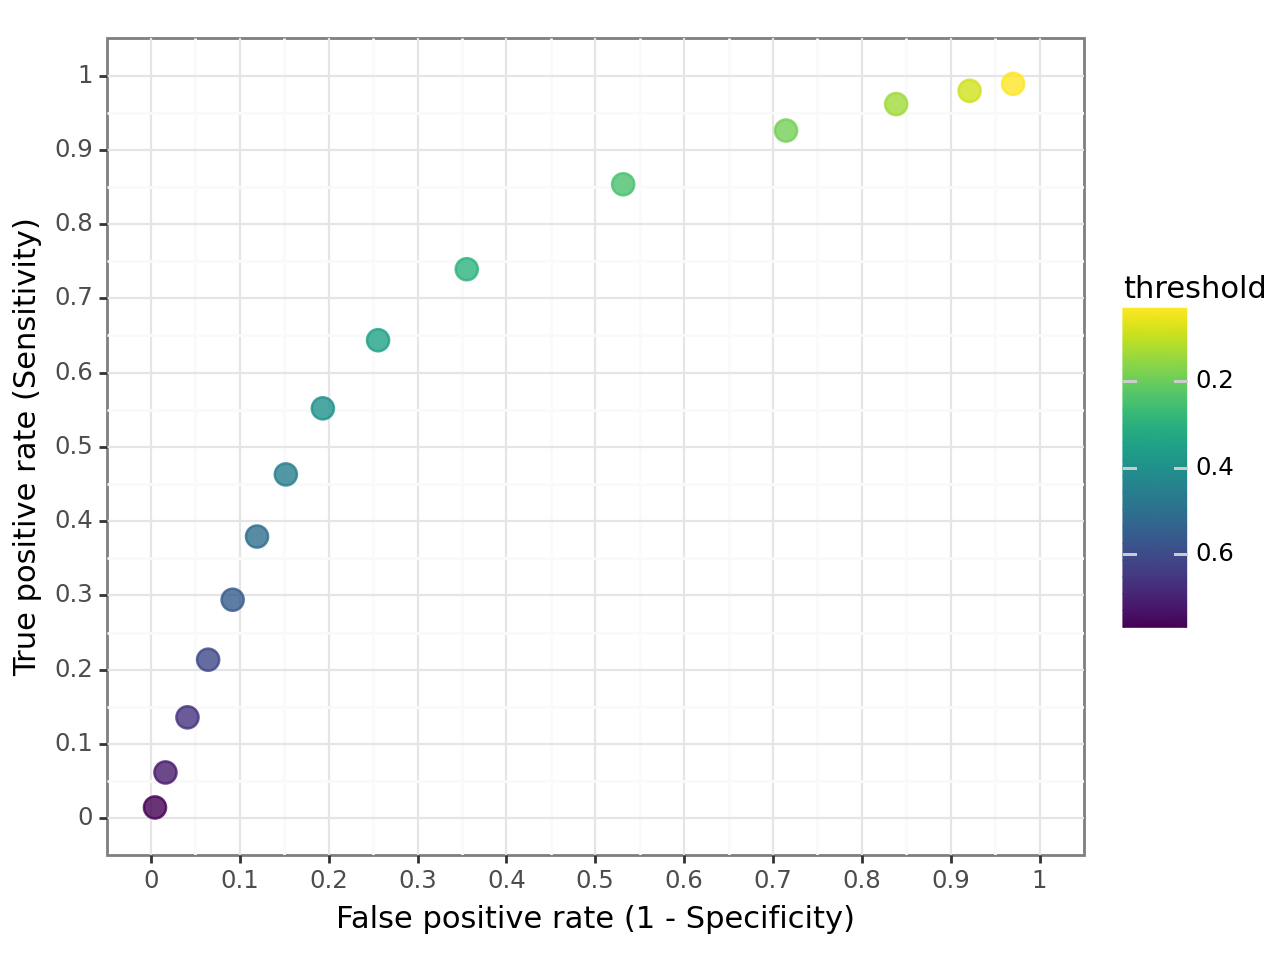

<Figure Size: (640 x 480)>

In [89]:
(
    ggplot(
        tpr_fpr_for_thresholds,
        aes(x="false_positive_rates", y="true_positive_rates", color="thresholds"),
    )
    + labs(
        x="False positive rate (1 - Specificity)", y="True positive rate (Sensitivity)"
    )
    + geom_point(size=4, alpha=0.8)
    + scale_color_continuous(trans="reverse", name="threshold")
    + scale_x_continuous(limits=(0, 1), breaks=np.arange(0, 1.01, 0.1))
    + scale_y_continuous(limits=(0, 1), breaks=np.arange(0, 1.01, 0.1))
    + theme_bw()
    + theme(legend_position="right")
)

## LOSS function

In [90]:
FP = 1
FN = 10
cost = FN / FP

In [91]:
prevelance = y_train.sum() / len(y_train)

In [92]:
best_thresholds_cv = dict()
expected_loss_cv = dict()
fold5_threshold = dict()
fold5_expected_loss = dict()
fold5_all_coords = dict()

for i, model_name in enumerate(logit_models):
    best_thresholds = []
    expected_loss = []

    if model_name != "LASSO":
        _, X = patsy.dmatrices("growth ~" + "+".join(logit_model_vars[i]), data_train)
        X = pd.DataFrame(X)
        c_index = 0
    else:
        X = normalized_logitvars
        c_index = best_lambda_i
    fold = 0
    for train_index, test_index in k.split(X):
        X_fold = X.iloc[test_index, :]
        y_fold = data_train["growth"].iloc[test_index]
        pred_fold = generate_fold_prediction(
            logit_models[model_name], X_fold, fold, c_index
        )
        false_pos_rate, true_pos_rate, thresholds = roc_curve(y_fold, pred_fold)
        optimal_threshold = sorted(
            list(
                zip(
                    np.abs(
                        true_pos_rate
                        + (1 - prevelance) / (cost * prevelance) * (1 - false_pos_rate)
                    ),
                    thresholds,
                          )
            ),
            key=lambda i: i[0],
            reverse=True,
        )[0][1]
        best_thresholds.append(optimal_threshold)
        threshold_prediction = np.where(pred_fold < optimal_threshold, 0, 1)
        tn, fp, fn, tp = confusion_matrix(
            y_fold, threshold_prediction, labels=[0, 1]
        ).ravel()
        curr_exp_loss = (fp * FP + fn * FN) / len(y_fold)
        expected_loss.append(curr_exp_loss)
        fold = fold + 1

    best_thresholds_cv[model_name] = np.mean(best_thresholds)
    expected_loss_cv[model_name] = np.mean(expected_loss)

    # for fold #5
    fold5_threshold[model_name] = optimal_threshold
    fold5_expected_loss[model_name] = curr_exp_loss

    all_coords = pd.DataFrame(
        {
            "false_pos": false_pos_rate * sum(y_fold == 0),
            "true_pos": true_pos_rate * sum(y_fold == 1),
            "false_neg": sum(y_fold == 1) - true_pos_rate * sum(y_fold == 1),
            "true_neg": sum(y_fold == 0) - false_pos_rate * sum(y_fold == 0),
            "pos": sum(y_fold == 1),
            "neg": sum(y_fold == 0),
            "n": len(y_fold),
            "thresholds": thresholds,
        }
    )

    fold5_all_coords[model_name] = all_coords

In [93]:
summary_with_lossfnc = pd.DataFrame(
    best_thresholds_cv.items(), columns=["Model", "Avg of optimal thresholds"]
)
summary_with_lossfnc["Threshold for Fold5"] = fold5_threshold.values()
summary_with_lossfnc["Avg expected loss"] = expected_loss_cv.values()
summary_with_lossfnc["Expected loss for Fold5"] = fold5_expected_loss.values()

In [94]:
summary_with_lossfnc = pd.DataFrame(
    best_thresholds_cv.items(), columns=["Model", "Avg of optimal thresholds"]
)
summary_with_lossfnc["Threshold for Fold5"] = fold5_threshold.values()
summary_with_lossfnc["Avg expected loss"] = expected_loss_cv.values()
summary_with_lossfnc["Expected loss for Fold5"] = fold5_expected_loss.values()

In [125]:
best_logit_optimal_treshold = best_thresholds_cv["M2"]

# Get expected loss on holdout
holdout_treshold = np.where(
    data_holdout["best_logit_pred_proba"] < best_logit_optimal_treshold, 0, 1
)
tn, fp, fn, tp = confusion_matrix(
    data_holdout["growth"], holdout_treshold, labels=[0, 1]
).ravel()
expected_loss_holdout = (fp * FP + fn * FN) / len(data_holdout["growth"])
round(expected_loss_holdout, 3)

0.679

In [96]:
cm_object3 = confusion_matrix(data_holdout["growth"], holdout_treshold, labels=[0, 1])
cm3 = pd.DataFrame(
    cm_object3,
    index=["Actul no growth", "Actual growth"],
    columns=["Predicted no growth", "Predicted growth"],
)
cm3

,Predicted no growth,Predicted growth
Actul no growth,436,11955
Actual growth,80,6374


## IX. PREDICTION WITH RANDOM FOREST

In [97]:
y_train, rfvars_train = patsy.dmatrices("growth~" + "+".join(rfvars), data_train)
y_holdout, rfvars_holdout = patsy.dmatrices("growth~" + "+".join(rfvars), data_holdout)

In [98]:
grid = {
    "max_features": [5, 6, 7],
    "criterion": ["gini"],
    "min_samples_split": [11, 16],
} 

In [99]:
prob_forest = RandomForestClassifier(random_state=42, n_estimators=100, oob_score=True)
prob_forest_grid = GridSearchCV(
    prob_forest,
    grid,
    cv=k,
    refit="roc_auc",
    scoring=["roc_auc", "neg_brier_score"],
)

In [100]:
prob_forest_fit = prob_forest_grid.fit(rfvars_train, y_train)

In [101]:
prob_forest_cv_results = pd.DataFrame(
    {
        "max_features": prob_forest_fit.cv_results_["param_max_features"],
        "min_samples_split": prob_forest_fit.cv_results_["param_min_samples_split"],
        "cv_auc": prob_forest_fit.cv_results_["mean_test_roc_auc"],
        "cv_rmse": np.sqrt(
            prob_forest_fit.cv_results_["mean_test_neg_brier_score"] * -1
        ),
    }
)

prob_forest_cv_results

,max_features,min_samples_split,cv_auc,cv_rmse
0,5,11,0.759770,0.429757
1,5,16,0.761230,0.429185
2,6,11,0.758551,0.429956
3,6,16,0.762004,0.428675
4,7,11,0.759782,0.429436
5,7,16,0.762191,0.428695


In [102]:
best_mtry = prob_forest_fit.best_params_["max_features"]
best_min_node_size = prob_forest_fit.best_params_["min_samples_split"]
prob_forest_fit.best_params_

{'criterion': 'gini', 'max_features': 7, 'min_samples_split': 16}

In [103]:
prob_forest_best_results = prob_forest_cv_results[
    (prob_forest_cv_results.max_features == best_mtry)
    & (prob_forest_cv_results.min_samples_split == best_min_node_size)
]
prob_forest_best_results_index = prob_forest_best_results.index.values[0]

In [104]:
summary.loc["RF", "Number of Coefficients"] = "n.a."
summary.loc["RF", "CV RMSE"] = prob_forest_best_results["cv_rmse"].values[0]
summary.loc["RF", "CV AUC"] = prob_forest_best_results["cv_auc"].values[0]
summary

,Number of Coefficients,CV RMSE,CV AUC
M1,11.0,0.468254,0.619972
M2,18.0,0.458421,0.672762
M3,34.0,0.444270,0.731864
M4,70.0,0.441967,0.737195
M5,143.0,0.442446,0.733994
LASSO,89.0,0.442048,0.736526
RF,n.a.,0.428695,0.762191


In [105]:
CV_RMSE_folds["RF"] = np.sqrt(
    pd.DataFrame(prob_forest_fit.cv_results_)
    .filter(like="_test_neg_brier_score")
    .loc[lambda x: x["rank_test_neg_brier_score"] == 1]
    .filter(like="split")
    .values[0]
    * -1
)
CV_AUC_folds["RF"] = (
    pd.DataFrame(prob_forest_fit.cv_results_)
    .filter(like="_test_roc_auc")
    .loc[lambda x: x["rank_test_roc_auc"] == 1]
    .filter(like="split")
    .values[0]
)

In [106]:
pd.DataFrame(CV_RMSE_folds)

,M1,M2,M3,M4,M5,LASSO,RF
0,0.470362,0.461790,0.444449,0.442547,0.443389,0.441975,0.429197
1,0.466114,0.455568,0.440637,0.438645,0.439382,0.439649,0.426914
2,0.469680,0.460880,0.447971,0.445212,0.446895,0.446423,0.432315
3,0.467930,0.457059,0.444524,0.442087,0.442194,0.441777,0.427218
4,0.467187,0.456808,0.443768,0.441345,0.440369,0.440417,0.427707


In [107]:
pd.DataFrame(CV_AUC_folds)

,M1,M2,M3,M4,M5,LASSO,RF
0,0.610019,0.660627,0.731059,0.734565,0.730648,0.735488,0.763272
1,0.635669,0.684097,0.741925,0.746128,0.742515,0.743525,0.766275
2,0.618508,0.668864,0.721954,0.730726,0.723772,0.725626,0.754917
3,0.617064,0.675020,0.729834,0.735437,0.733133,0.735973,0.764129
4,0.618602,0.675204,0.734549,0.739119,0.739900,0.742021,0.762363


In [108]:
best_thresholds = list()
expected_loss = list()
rfvars_train = pd.DataFrame(rfvars_train)

fold = 0
for train_index, test_index in k.split(rfvars_train):
    X_fold = rfvars_train.iloc[test_index, :]
    y_fold = data_train["growth"].iloc[test_index]

    X_fold_train = rfvars_train.iloc[train_index, :]
    y_fold_train = data_train["growth"].iloc[train_index]

    prob_forest_best = RandomForestClassifier(
        random_state=42,
        n_estimators=500,
        oob_score=True,
        criterion="gini",
        max_features=best_mtry,
        min_samples_split=best_min_node_size,
    )
    prob_forest_best_fold = prob_forest_best.fit(X_fold_train, y_fold_train)
    pred_fold = prob_forest_best_fold.predict_proba(X_fold)[:, 1]

    false_pos_rate, true_pos_rate, threshold = roc_curve(y_fold, pred_fold)
    best_threshold = sorted(
        list(
            zip(
                np.abs(
                    true_pos_rate
                    + (1 - prevelance) / (cost * prevelance) * (1 - false_pos_rate)
                ),
                threshold,
            )
        ),
        key=lambda x: x[0],
        reverse=True,
    )[0][1]
    best_thresholds.append(best_threshold)
    threshold_prediction = np.where(pred_fold < best_threshold, 0, 1)
    tn, fp, fn, tp = confusion_matrix(
        y_fold, threshold_prediction, labels=[0, 1]
    ).ravel()
    curr_exp_loss = (fp * FP + fn * FN) / len(y_fold)
    expected_loss.append(curr_exp_loss)

fold5_threshold_rf = best_threshold
fold5_expected_loss_rf = curr_exp_loss

all_coords_rf = pd.DataFrame(
    {
        "false_pos": false_pos_rate * sum(y_fold == 0),
        "true_pos": true_pos_rate * sum(y_fold == 1),
        "false_neg": sum(y_fold == 1) - true_pos_rate * sum(y_fold == 1),
        "true_neg": sum(y_fold == 0) - false_pos_rate * sum(y_fold == 0),
        "pos": sum(y_fold == 1),
        "neg": sum(y_fold == 0),
        "n": len(y_fold),
        "thresholds": threshold,
    }
)

In [109]:
expected_loss_cv["RF"] = np.mean(expected_loss)
best_thresholds_cv["RF"] = np.mean(best_thresholds)

In [110]:
rf_summary = pd.DataFrame(
    {
        "CV RMSE": [round(prob_forest_best_results["cv_rmse"].values[0], 3)],
        "CV AUC": [round(prob_forest_best_results["cv_auc"].values[0], 3)],
        "Avg of optimal thresholds": [round(best_thresholds_cv["RF"], 3)],
        "Threshold for Fold5": [round(best_threshold, 3)],
        "Avg expected loss": [round(expected_loss_cv["RF"], 3)],
        "Expected loss for Fold5": [round(curr_exp_loss, 3)],
    }
)

rf_summary

,CV RMSE,CV AUC,Avg of optimal thresholds,Threshold for Fold5,Avg expected loss,Expected loss for Fold5
0,0.429,0.762,0.092,0.071,0.631,0.636


In [111]:
prob_forest_fit_best = prob_forest_fit.best_estimator_
rf_predicted_probabilities_holdout = prob_forest_fit_best.predict_proba(rfvars_holdout)[
    :, 1
]
rmse_rf = np.sqrt(mean_squared_error(y_holdout, rf_predicted_probabilities_holdout))
round(rmse_rf, 3)

0.418

In [112]:
auc_rf = roc_auc_score(y_holdout, rf_predicted_probabilities_holdout)
round(auc_rf, 3)

0.784

In [113]:
holdout_treshold = np.where(
    rf_predicted_probabilities_holdout < best_thresholds_cv["RF"], 0, 1
)
tn, fp, fn, tp = confusion_matrix(y_holdout, holdout_treshold, labels=[0, 1]).ravel()
expected_loss_holdout = (fp * FP + fn * FN) / len(y_holdout)
round(expected_loss_holdout, 3)

0.628

## X. Final Result

In [114]:
summary["CV treshold"] = best_thresholds_cv
summary["CV expected Loss"] = expected_loss_cv

In [115]:
summary

,Number of Coefficients,CV RMSE,CV AUC,CV treshold,CV expected Loss
M1,11.0,0.468254,0.619972,0.104495,0.643410
M2,18.0,0.458421,0.672762,0.110783,0.640303
M3,34.0,0.444270,0.731864,0.065599,0.642357
M4,70.0,0.441967,0.737195,0.056125,0.641830
M5,143.0,0.442446,0.733994,0.050778,0.642620
LASSO,89.0,0.442048,0.736526,0.049741,0.640777
RF,n.a.,0.428695,0.762191,0.092003,0.631088


In [116]:
filtered_data = data[data['year'].isin([2012, 2013])]
filtered_data.describe()

,year,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,...,flag_high_ceo_age,flag_miss_ceo_age,ceo_young,labor_avg_mod,flag_miss_labor_avg,sales_mil_log_sq,flag_low_d1_sales_mil_log,flag_high_d1_sales_mil_log,d1_sales_mil_log_mod,d1_sales_mil_log_mod_sq
count,37836.000000,3.783600e+04,3.783600e+04,3.783600e+04,3.783600e+04,3.783600e+04,3.783600e+04,3.783600e+04,3.783600e+04,3.783600e+04,...,37836.000000,37836.000000,37836.000000,37836.000000,37836.000000,3.783600e+04,37836.000000,37836.000000,37836.000000,37836.000000
mean,2012.498071,1.534646e+11,8.620781e+03,9.143963e+04,8.120690e+04,4.143722e+02,1.584372e+03,1.193438e+03,1.431227e+05,5.944010e+03,...,0.004757,0.117692,0.269822,0.622150,0.173063,1.209674e+01,0.041257,0.023972,-0.028136,0.300554
std,0.500003,1.378303e+11,4.382598e+04,3.768179e+05,4.045281e+05,8.456646e+03,3.130731e+04,3.090403e+04,1.117435e+06,1.127953e+05,...,0.068810,0.322247,0.443873,1.299125,0.378306,1.040316e+01,0.198887,0.152964,0.547513,0.615801
min,2012.000000,1.001541e+06,-1.489630e+04,0.000000e+00,-8.759259e+03,-3.703704e+03,-1.470000e+04,-3.909408e+05,0.000000e+00,-1.091879e+07,...,0.000000,0.000000,0.000000,0.083333,0.000000,2.074996e-07,0.000000,0.000000,-1.500000,0.000000
25%,2012.000000,2.904862e+10,1.148148e+02,3.492593e+03,3.818519e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.851852e+02,-5.785185e+03,...,0.000000,0.000000,0.000000,0.145833,0.000000,3.879838e+00,0.000000,0.000000,-0.181130,0.001224
50%,2012.000000,1.148334e+11,8.962963e+02,1.202222e+04,1.512593e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.757407e+03,3.703704e+02,...,0.000000,0.000000,0.000000,0.333333,0.000000,9.642626e+00,0.000000,0.000000,0.000000,0.028947
75%,2013.000000,2.571586e+11,4.092593e+03,4.180741e+04,4.869722e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.111574e+04,4.622222e+03,...,0.000000,0.000000,1.000000,0.645934,0.000000,1.725503e+01,0.000000,0.000000,0.161794,0.206393
max,2013.000000,4.641050e+11,3.570863e+06,1.874527e+07,3.660118e+07,1.007889e+06,3.266667e+06,3.253704e+06,1.036673e+08,4.378226e+06,...,1.000000,1.000000,1.000000,42.118057,1.000000,4.771708e+01,1.000000,1.000000,1.500000,2.250000


In [134]:
# Create a dummy variable for manufacturing sector
manufacture = [27,29,28,26,30]
data['manufacture_dummy'] = data['ind2'].isin(manufacture).astype(int)

In [145]:
print(X_train_manufacturing.dtypes)

year                            int64
comp_id                       float64
begin                          object
end                            object
amort                         float64
                               ...   
sales_mil_log_sq              float64
flag_low_d1_sales_mil_log       int32
flag_high_d1_sales_mil_log      int32
d1_sales_mil_log_mod          float64
d1_sales_mil_log_mod_sq       float64
Length: 108, dtype: object


KeyError: "None of [Index(['categorical_column'], dtype='object')] are in the [columns]"

In [146]:
model_manufacturing = RandomForestClassifier(random_state=42, n_estimators=200)
model_manufacturing.fit(X_train_manufacturing, y_train_manufacturing)
predictions_manufacturing = model_manufacturing.predict(X_test_manufacturing)


ValueError: could not convert string to float: '2010-01-01'